In [1]:
import time
start_time = time.time()

# Preparation - Load the packages and the data

Import the packages and load the data

In [2]:
# Import needed packages
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns; sns.set()
import glob
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import re
import nltk
from langdetect import detect
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from lime import lime_text
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
import transformers
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer
from nbpep8.nbpep8 import pep8
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#Set the working directory
os.chdir('C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Thesis\\')
pd.set_option('display.max_columns', None)

In [5]:
# #Load the merged_df from the directory 'C:\\Users\\piotr\\OneDrive - Erasmus University Rotterdam\\Thesis\\Master Thesis Data\\' (containing the readability results)):
merged_df = pd.read_csv('Master Thesis Data\\df_clean_final.csv')

In [6]:
#Load the results of the content novelty calculation, that were saved as follows:
final_result_df_tfidf = pd.read_csv('Master Thesis Data\\final_result_df_tfidf.csv')
final_result_df_lsi = pd.read_csv('Master Thesis Data\\final_result_df_lsi.csv')
final_result_df_doc2vec = pd.read_csv('Master Thesis Data\\final_result_df_doc2vec.csv')

# Important - FIX

In [7]:
df_MAT = pd.read_csv('Master Thesis Data\\FIX\\merged_df_after_notebook5_FIX.csv')

In [14]:
print(merged_df.shape)
print(merged_df.columns)
print(df_MAT.shape)
print(df_MAT.columns)

(3040730, 30)
Index(['Post_Creation_Date', 'Post_View_Count', 'Post_Title', 'Post_Score',
       'Post_Answer_Count', 'Response_Scores', 'Post_Author', 'Answer_Author',
       'Forum', 'Week_of_Year', 'tag_1', 'tag_2', 'tag_3', 'Post_Body_clean',
       'tag_combined', 'Weekly_Post_Count', 'D', 'T', 'Title_Length',
       'Body_Length', 'Post_Body', 'Post_Body_EN', 'ari', 'fre', 'fk_grade',
       'gunning_fog', 'smog_index', 'coleman_liau_index', 'lix', 'rix'],
      dtype='object')
(165729, 30)
Index(['Post_Creation_Date', 'Post_View_Count', 'Post_Title', 'Post_Score',
       'Post_Answer_Count', 'Response_Scores', 'Post_Author', 'Answer_Author',
       'Forum', 'Week_of_Year', 'tag_1', 'tag_2', 'tag_3', 'Post_Body_clean',
       'tag_combined', 'Weekly_Post_Count', 'D', 'T', 'Post_Body',
       'Title_Length', 'Body_Length', 'Post_Body_EN', 'ari', 'fre', 'fk_grade',
       'gunning_fog', 'smog_index', 'coleman_liau_index', 'lix', 'rix'],
      dtype='object')


In [10]:
#Drop answer body from df_MAT
df_MAT = df_MAT.drop(['Answer_Body'], axis=1)

In [17]:
#Concat the dfs
df = pd.concat([merged_df, df_MAT], ignore_index=True)

In [19]:
# show forum counts in df
print(df['Forum'].value_counts())

Stack Overflow                  2451718
Mathematics                      165729
Stack Overflow in Russian         73932
Stack Overflow in Spanish         41099
Ask Ubuntu                        37819
Super User                        36193
MathOverflow                      34322
Physics                           32556
Statistical Analysis              29399
Unix and Linux                    27819
TeX - LaTeX                       27798
Electrical Engineering            26176
Blender                           23378
GIS                               19150
Server Fault                      19065
Salesforce                        15999
Ethereum                          15056
English Language Learners         14325
Home Improvement                  12089
Ask Different                     11956
Mathematica                       10485
Database Administrators           10019
English                            7245
Magento                            7200
WordPress                          7126


# 6. Data Exploration

In [ ]:
merged_df.head(3)

,Post_Creation_Date,Post_View_Count,Post_Title,Post_Score,Post_Answer_Count,Response_Scores,Post_Author,Answer_Author,Forum,Week_of_Year,tag_1,tag_2,tag_3,Post_Body_clean,tag_combined,Weekly_Post_Count,D,T,Title_Length,Body_Length,Post_Body,Post_Body_EN,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix
0,2021-07-01 00:00:58,5867,"railsinstaller.org website was not found, what...",1,3,1,8530236,8530236,Stack Overflow,26,ruby-on-rails,ssl,NaN,im taking course ruby rail video instructor re...,ruby-on-railsssl,30616,0,0,59,315,<p>I'm taking a course on Ruby on Rails. In th...,I'm taking a course on Ruby on Rails. In the v...,6.1,72.83,4.8,8.51,8.8,8.01,32.250000,1.625000
1,2021-07-01 00:01:10,11,Insert page break if MS Word document is endin...,0,0,0,3893947,0,Stack Overflow,26,ms-word,NaN,NaN,erp system generates statement via word docx t...,ms-word,30616,0,0,65,718,<p>I have an ERP system which generates statem...,I have an ERP system which generates statement...,7.3,79.60,6.4,7.81,8.4,6.44,29.188609,2.111111
2,2021-07-01 00:01:18,1393,Plotly: How to show subplot titles at the bottom,1,1,2,2313889,13107804,Stack Overflow,26,python,plotly,subplot,given example plotly documentation displayed c...,plotlypython,30616,0,0,48,1095,"<p>Given this example from <a href=""https://pl...",Given this example from plotly documentation\n...,11.4,57.61,10.7,14.25,0.0,9.34,NaN,NaN


In [ ]:
merged_df['Post_Creation_Date'] = pd.to_datetime(merged_df['Post_Creation_Date'])

In [ ]:
merged_df['Month_of_Year'] = merged_df['Post_Creation_Date'].dt.month

Data frame - grouped on forum level

In [ ]:
grouped_df = merged_df.groupby(['Forum', merged_df['Post_Creation_Date'].dt.date]).agg(
    Post_Count=('Post_Creation_Date', 'count'),
    Post_Answer_Count=('Post_Answer_Count', 'sum'),
    ari = ('ari', 'mean'),
    fre = ('fre', 'mean'),
    fk_grade = ('fk_grade', 'mean'),
    gunning_fog = ('gunning_fog', 'mean'),
    smog_index = ('smog_index', 'mean'),
    coleman_liau_index = ('coleman_liau_index', 'mean'),
    lix = ('lix', 'mean'),
    rix = ('rix', 'mean'),
    Week_of_Year=('Week_of_Year', 'first'),
    Month_of_Year=('Month_of_Year', 'first'),
    Post_View_Count=('Post_View_Count', 'sum'),
    Post_Score=('Post_Score', 'sum'),
    Response_Scores=('Response_Scores', 'sum'),
    Post_Author=('Post_Author', 'nunique'),
    Answer_Author=('Answer_Author', 'nunique'),
    Title_Length = ('Title_Length', 'mean'),
    Body_Length=('Body_Length', 'mean')
).reset_index()

In [ ]:
merged_df['tag_combined'].nunique()

333203

In [26]:
grouped_df_tag = merged_df.groupby(['tag_combined', merged_df['Post_Creation_Date'].dt.date]).agg(
    Post_Count=('Post_Creation_Date', 'count'),
    Post_Answer_Count=('Post_Answer_Count', 'sum'),
    ari = ('ari', 'mean'),
    fre = ('fre', 'mean'),
    fk_grade = ('fk_grade', 'mean'),
    gunning_fog = ('gunning_fog', 'mean'),
    smog_index = ('smog_index', 'mean'),
    coleman_liau_index = ('coleman_liau_index', 'mean'),
    lix = ('lix', 'mean'),
    rix = ('rix', 'mean'),
    Week_of_Year=('Week_of_Year', 'first'),
    Month_of_Year=('Month_of_Year', 'first'),
    Post_View_Count=('Post_View_Count', 'sum'),
    Post_Score=('Post_Score', 'sum'),
    Response_Scores=('Response_Scores', 'sum'),
    Post_Author=('Post_Author', 'nunique'),
    Answer_Author=('Answer_Author', 'nunique'),
    Title_Length = ('Title_Length', 'mean'),
    Body_Length=('Body_Length', 'mean')
).reset_index()

In [29]:
grouped_df_tag

,tag_combined,Post_Creation_Date,Post_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix,Week_of_Year,Month_of_Year,Post_View_Count,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
0,.aasp.net-mvc,2023-01-31,1,0,15.3,59.98,11.8,12.63,0.0,10.97,NaN,NaN,5,1,17,0,0,1,1,51.0,787.0
1,.app,2022-12-13,1,0,16.3,66.41,11.5,14.67,0.0,9.24,NaN,NaN,50,12,13,0,0,1,1,34.0,189.0
2,.appios,2023-03-17,1,1,5.1,71.21,5.5,5.44,8.8,6.75,33.571429,2.142857,11,3,30,-1,0,1,1,41.0,367.0
3,.appmacos,2022-01-16,1,0,6.6,76.52,5.5,6.05,7.9,7.00,24.202381,1.416667,2,1,194,0,0,1,1,41.0,815.0
4,.asmxautentid,2023-02-04,1,0,0.0,206.84,-15.7,0.00,0.0,-15.81,NaN,NaN,5,2,34,0,0,1,1,54.0,5809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785722,яндекс-карты,2021-09-21,1,1,0.0,206.84,-15.7,0.00,0.0,-15.81,NaN,NaN,38,9,829,0,0,1,1,72.0,369.0
1785723,яндекс-карты,2022-02-08,1,0,0.0,206.84,-15.7,0.00,0.0,-15.81,NaN,NaN,6,2,47,0,0,1,1,45.0,1202.0
1785724,яндекс-карты,2022-11-22,1,0,0.0,206.84,-15.7,0.00,0.0,-15.81,NaN,NaN,47,11,18,0,0,1,1,26.0,520.0
1785725,яндексяндекс-карты,2022-04-02,1,0,0.0,206.84,-15.7,0.00,0.0,-15.81,NaN,NaN,13,4,35,0,0,1,1,72.0,258.0


## 6.2 Descriptive statistics

In [54]:
# Set pandas to display large numbers without using scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x if x < 1000000 else '%.2e' % x)

# Select the desired columns and arrange them in the specific order
cols = ['Post_View_Count', 'Post_Answer_Count', 'ari', 'fre', 'fk_grade', 
        'gunning_fog', 'smog_index', 'coleman_liau_index', 'lix', 'rix', 
        'Post_Score', 'Response_Scores', 'Post_Author', 'Answer_Author', 
        'Title_Length', 'Body_Length']

# Describe the specific columns and round the result to 2 decimal places
df_description = merged_df[cols].describe().round(2)

# # Print the DataFrame
# print(df_description)


In [55]:
df_description

,Post_View_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
count,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,2.72e+06,2.72e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06,3.04e+06
mean,356.90,0.93,9.63,73.20,7.47,9.52,7.68,7.23,43.59,4.59,0.52,1.05,9.84e+06,2.28e+06,60.96,1791.20
std,2175.89,0.90,7.92,35.91,6.78,4.72,4.48,8.18,16.30,3.48,2.59,6.88,7.50e+06,4.85e+06,23.93,2365.48
min,2.00,0.00,-11.60,-7238.99,-15.70,0.00,0.00,-33.81,1.23,0.00,-654.00,-15.00,0.00,0.00,15.00,38.00
25%,45.00,0.00,6.10,60.31,5.70,7.20,6.40,5.74,33.78,2.50,0.00,0.00,1.48e+06,0.00,44.00,640.00
50%,97.00,1.00,8.60,70.33,7.60,9.06,8.80,7.50,40.33,3.75,0.00,0.00,1.06e+07,0.00,57.00,1135.00
75%,275.00,1.00,11.70,79.30,9.90,11.30,10.70,9.43,49.12,5.50,1.00,1.00,1.69e+07,850848.00,73.00,2041.00
max,1.54e+06,217.00,3200.70,206.84,1023.20,760.40,63.80,3742.00,2078.22,210.00,1442.00,4076.00,2.18e+07,2.18e+07,150.00,115919.00


In [32]:
merged_df.describe()

,Post_View_Count,Post_Score,Post_Answer_Count,Response_Scores,Post_Author,Answer_Author,Week_of_Year,Weekly_Post_Count,D,T,Title_Length,Body_Length,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix,Month_of_Year
count,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,3.040730e+06,2.719045e+06,2.719045e+06,3.040730e+06
mean,3.569015e+02,5.155486e-01,9.302099e-01,1.051807e+00,9.840426e+06,2.284559e+06,2.768798e+01,6.989578e+04,5.101423e-01,4.752402e-01,6.095675e+01,1.791196e+03,9.631843e+00,7.319989e+01,7.473083e+00,9.516861e+00,7.682101e+00,7.229296e+00,4.359450e+01,4.590936e+00,6.808192e+00
std,2.175892e+03,2.589751e+00,9.012956e-01,6.876208e+00,7.503406e+06,4.847633e+06,1.610273e+01,5.847165e+03,4.998972e-01,4.993867e-01,2.392591e+01,2.365475e+03,7.915758e+00,3.591322e+01,6.778735e+00,4.715555e+00,4.480587e+00,8.180536e+00,1.630123e+01,3.480903e+00,3.712794e+00
min,2.000000e+00,-6.540000e+02,0.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.061600e+04,0.000000e+00,0.000000e+00,1.500000e+01,3.800000e+01,-1.160000e+01,-7.238990e+03,-1.570000e+01,0.000000e+00,0.000000e+00,-3.381000e+01,1.229730e+00,0.000000e+00,1.000000e+00
25%,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.476900e+06,0.000000e+00,1.200000e+01,6.677300e+04,0.000000e+00,0.000000e+00,4.400000e+01,6.400000e+02,6.100000e+00,6.031000e+01,5.700000e+00,7.200000e+00,6.400000e+00,5.740000e+00,3.377957e+01,2.500000e+00,3.000000e+00
50%,9.700000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.058874e+07,0.000000e+00,3.100000e+01,7.172000e+04,1.000000e+00,0.000000e+00,5.700000e+01,1.135000e+03,8.600000e+00,7.033000e+01,7.600000e+00,9.060000e+00,8.800000e+00,7.500000e+00,4.033333e+01,3.750000e+00,8.000000e+00
75%,2.750000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.688979e+07,8.508480e+05,4.200000e+01,7.321500e+04,1.000000e+00,1.000000e+00,7.300000e+01,2.041000e+03,1.170000e+01,7.930000e+01,9.900000e+00,1.130000e+01,1.070000e+01,9.430000e+00,4.912222e+01,5.500000e+00,1.000000e+01
max,1.539162e+06,1.442000e+03,2.170000e+02,4.076000e+03,2.178334e+07,2.183285e+07,5.200000e+01,7.662500e+04,1.000000e+00,1.000000e+00,1.500000e+02,1.159190e+05,3.200700e+03,2.068400e+02,1.023200e+03,7.604000e+02,6.380000e+01,3.742000e+03,2.078217e+03,2.100000e+02,1.200000e+01


In [33]:
grouped_df.describe()

,Post_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix,Week_of_Year,Month_of_Year,Post_View_Count,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
count,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000,19949.000000,19949.000000,21199.000000,21199.000000,2.119900e+04,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000,21199.000000
mean,143.437426,133.426907,9.233710,79.312482,6.328329,9.091333,7.962218,6.353318,45.600388,5.088539,27.442945,6.734374,5.119303e+04,73.948960,150.868484,135.868909,39.835322,59.570578,1540.675731
std,690.486629,654.361848,4.596441,39.929490,6.911579,3.144240,2.935268,7.696499,6.980261,1.623603,16.214899,3.735811,2.961747e+05,296.087767,606.408861,657.170394,189.374297,8.823669,1172.449712
min,1.000000,0.000000,-0.050000,-846.665000,-15.700000,0.000000,0.000000,-15.810000,2.666667,0.000000,1.000000,1.000000,8.000000e+00,-681.000000,-35.000000,1.000000,1.000000,18.000000,90.000000
25%,9.000000,8.000000,8.230769,64.345210,7.117157,8.772857,7.371429,7.142404,41.365479,4.118366,11.000000,3.000000,1.720500e+03,5.000000,10.000000,8.000000,3.000000,54.082843,964.815136
50%,20.000000,20.000000,9.425000,69.025714,8.080000,9.677143,8.400000,7.966667,44.216159,4.746455,31.000000,8.000000,5.071000e+03,18.000000,34.000000,19.000000,7.000000,58.900000,1340.066667
75%,45.000000,38.000000,10.791987,73.448277,9.033333,10.569212,9.600000,8.982364,48.728903,5.763694,42.000000,10.000000,1.244450e+04,42.000000,84.000000,41.000000,12.000000,63.858619,1791.460938
max,5781.000000,5549.000000,407.925000,206.840000,135.037500,103.507500,16.150000,475.241250,216.686869,37.000000,52.000000,12.000000,4.092331e+06,4098.000000,8506.000000,5555.000000,1595.000000,150.000000,26187.000000


In [34]:
grouped_df_tag.describe()

,Post_Count,Post_Answer_Count,ari,fre,fk_grade,gunning_fog,smog_index,coleman_liau_index,lix,rix,Week_of_Year,Month_of_Year,Post_View_Count,Post_Score,Response_Scores,Post_Author,Answer_Author,Title_Length,Body_Length
count,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.649803e+06,1.649803e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06,1.785727e+06
mean,1.702791e+00,1.583957e+00,9.743219e+00,7.148092e+01,7.652281e+00,9.538855e+00,7.993915e+00,7.665369e+00,4.382093e+01,4.664626e+00,2.744717e+01,6.749644e+00,6.077299e+02,8.778744e-01,1.791013e+00,1.666516e+00,1.290252e+00,6.076177e+01,1.675043e+03
std,4.004419e+00,4.798777e+00,7.533684e+00,3.194954e+01,5.941535e+00,4.173419e+00,4.158521e+00,7.857920e+00,1.503988e+01,3.322388e+00,1.617645e+01,3.729418e+00,3.376570e+03,3.953680e+00,1.003982e+01,3.844415e+00,1.563119e+00,2.273064e+01,2.142495e+03
min,1.000000e+00,0.000000e+00,-1.160000e+01,-7.238990e+03,-1.570000e+01,0.000000e+00,0.000000e+00,-3.381000e+01,1.229730e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,-6.540000e+02,-1.500000e+01,1.000000e+00,1.000000e+00,1.500000e+01,3.800000e+01
25%,1.000000e+00,0.000000e+00,6.500000e+00,6.014500e+01,5.900000e+00,7.440000e+00,6.500000e+00,6.060000e+00,3.481043e+01,2.680988e+00,1.100000e+01,3.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.500000e+01,6.290000e+02
50%,1.000000e+00,1.000000e+00,8.850000e+00,6.952000e+01,7.700000e+00,9.170000e+00,9.050000e+00,7.720000e+00,4.105208e+01,3.950000e+00,3.100000e+01,8.000000e+00,1.320000e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.725000e+01,1.111000e+03
75%,1.000000e+00,1.000000e+00,1.170000e+01,7.808000e+01,9.800000e+00,1.117000e+01,1.070000e+01,9.596667e+00,4.907692e+01,5.593333e+00,4.200000e+01,1.000000e+01,4.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.200000e+01,1.938500e+03
max,1.550000e+02,2.190000e+02,3.200700e+03,2.068400e+02,1.023200e+03,7.604000e+02,5.300000e+01,3.742000e+03,8.607936e+02,2.070000e+02,5.200000e+01,1.200000e+01,1.543907e+06,1.447000e+03,4.083000e+03,1.430000e+02,6.000000e+01,1.500000e+02,1.089710e+05


In [37]:
# Save grouped_df = pd.read_csv('Master Thesis Data\\grouped_df.csv')
grouped_df.to_csv('Master Thesis Data\\grouped_df.csv', index=False)

In [38]:
# Save grouped_df = pd.read_csv('Master Thesis Data\\grouped_df.csv')
grouped_df_tag.to_csv('Master Thesis Data\\grouped_df_tag.csv', index=False)

## 5.2 EDA

Values of DVs over time

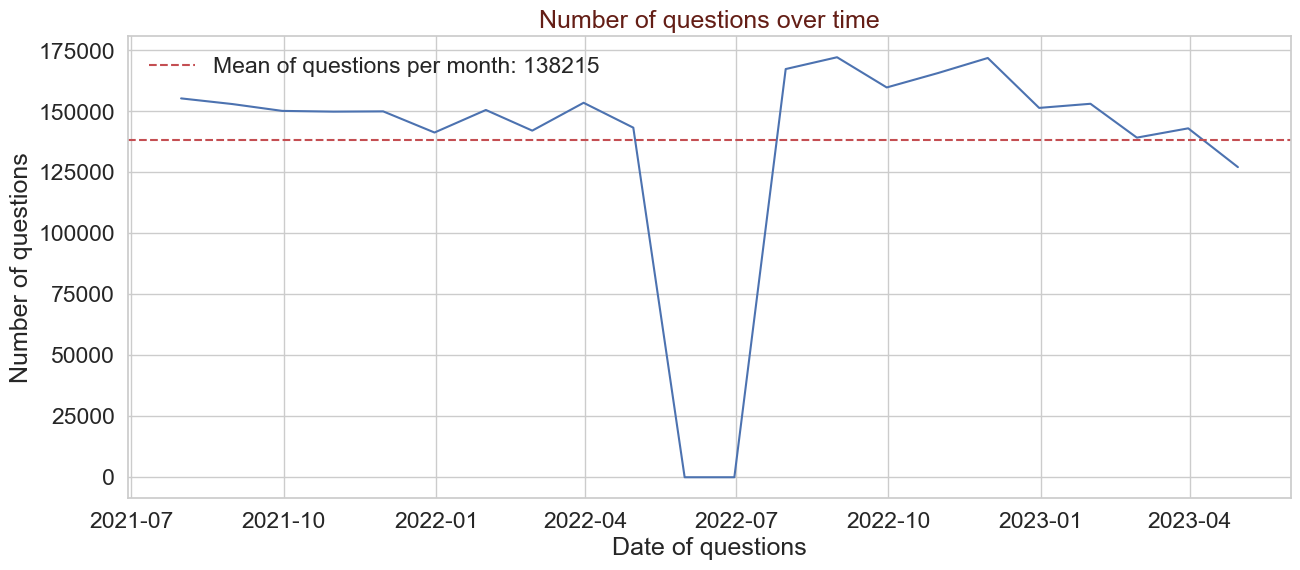

In [56]:
# Convert 'Post_Creation_Date' column to datetime format
merged_df['Post_Creation_Date'] = pd.to_datetime(merged_df['Post_Creation_Date'])

post_month = merged_df.groupby(pd.Grouper(key='Post_Creation_Date',
                                          freq='1M')).agg({'Post_Title': 'count'})

# Plot evolution
fig = plt.figure(figsize=(15,6))
sns.lineplot(data=post_month, x=post_month.index, y='Post_Title')
plt.axhline(post_month.Post_Title.mean(), 
            color="r", linestyle='--',
            label="Mean of questions per month: {:04d}"\
                  .format(int(post_month.Post_Title.mean()))) # Fix column name
plt.xlabel("Date of questions")
plt.ylabel("Number of questions")
plt.title("Number of questions over time",
          fontsize=18, color="#641E16")
plt.legend()
plt.show()


In [ ]:
end_time = time.time()
total_time = end_time - start_time
print("Total execution time: {:.2f} seconds".format(total_time))